In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams
import warnings;
warnings.simplefilter("ignore")

In [341]:
rcParams["figure.figsize"] = 8, 6

data = pd.read_excel("statistic_id12761_umsatz-mit-apple-iphones-weltweit-nach-quartalen-bis-q1-2021.xlsx",  sheet_name = "Daten")
data['Period'] = data['Period'].str.split(" ").apply(lambda x: ''.join(x[::-1]))
data['Period'] = data['Period'].apply(lambda x: x.replace("'", "").replace("*", "")) 
data

,Period,Umsatz
0,07Q3,5
1,07Q4,118
2,08Q1,241
3,08Q2,378
4,08Q3,419
5,08Q4,806
6,09Q1,2940
7,09Q2,2427
8,09Q3,3060
9,09Q4,4606


In [342]:


data = data.set_index("Period").asfreq("Q")
# data.index = pd.to_datetime(data.index, freq= "BQ")

data
# data  = data.asfreq('BQ')
# data.to_excel("Excl.xlsx")

,Umsatz
Period,
2007-09-30,NaN
2007-12-31,NaN
2008-03-31,NaN
2008-06-30,NaN
2008-09-30,NaN
2008-12-31,NaN
2009-03-31,NaN
2009-06-30,NaN
2009-09-30,NaN


In [399]:
data = pd.read_excel("Exc.xlsx", index_col =0)
data = data.astype("float")
data = data.asfreq("Q")
data

,Umsatz
Time,
2007-09-30,5.0
2007-12-31,118.0
2008-03-31,241.0
2008-06-30,378.0
2008-09-30,419.0
2008-12-31,806.0
2009-03-31,2940.0
2009-06-30,2427.0
2009-09-30,3060.0


In [401]:
train = data[:44]
test = data[44:]

In [402]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

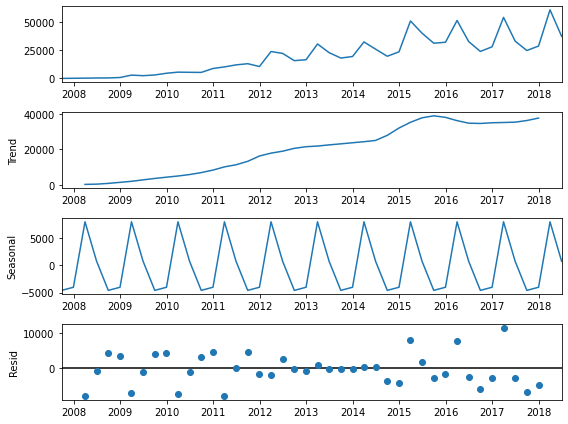

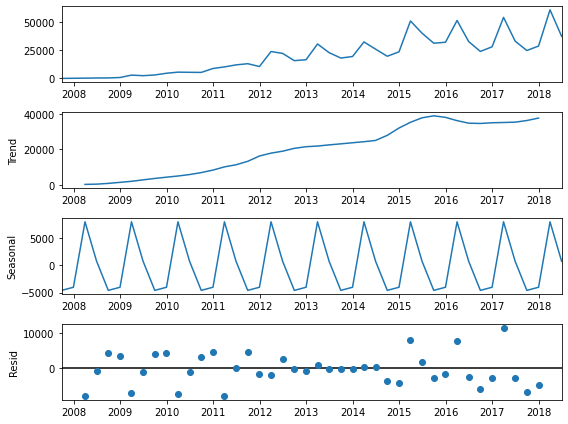

In [403]:
seasonal_decompose(train, model="additiv", freq = 4).plot()

In [404]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

<AxesSubplot:xlabel='Time'>

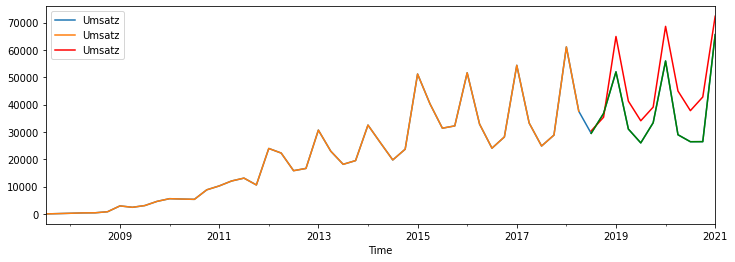

In [413]:
#lets predict the next dacade of flow.
HORIZON = 11

#for SES pass in the endog argument as your data

model = ExponentialSmoothing(train, trend="mul",  seasonal = 4)
results = model.fit()

preds = results.forecast(steps = HORIZON)
ax = data.plot(figsize=(12,4))
train.plot(ax=ax)
preds.plot(ax=ax, color = "red")
test.plot(ax=ax, color = "green")

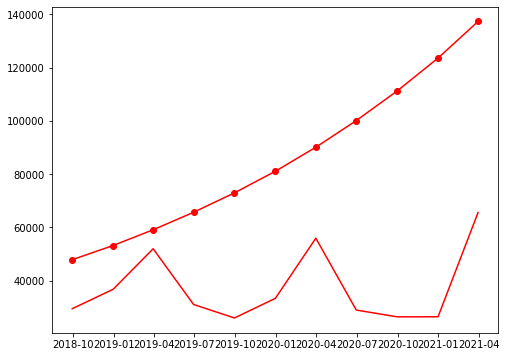

In [424]:
fit2 = Holt(train, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2,                                                                           optimized=False)
fcast2 = fit2.forecast(11).rename("Exponential trend")

plt.plot(test, color='red')
plt.plot (fcast2, marker='o', color='red')

<AxesSubplot:>

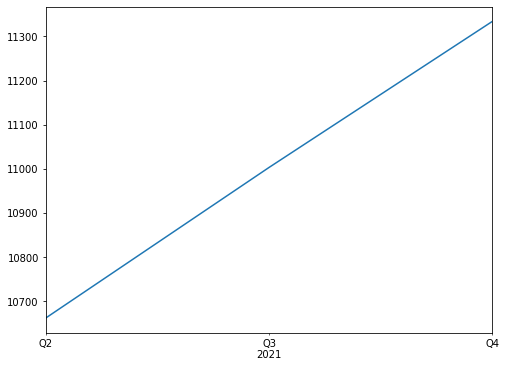

In [314]:
forecast["mean_se"].plot()

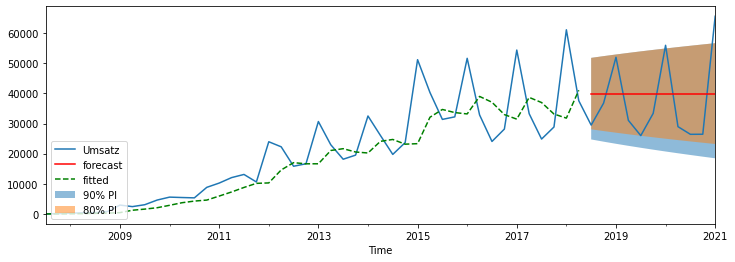

In [319]:
ax = data.plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[["mean_se","mean", "mean_ci_lower", "mean_ci_upper"]]
forecast_90 = preds.summary_frame(alpha=0.1)[["mean", "mean_ci_lower", "mean_ci_upper"]]

ax.fill_between(forecast_90.index, forecast_90["mean_ci_lower"], forecast_80["mean_ci_upper"], 
                alpha=0.5, label="90% PI");

ax.fill_between(forecast_80.index, forecast_80["mean_ci_lower"], forecast_80["mean_ci_upper"], 
                alpha=0.5, label="80% PI");

forecast_80["mean"].plot(ax=ax, label="forecast", color="red");

results.fittedvalues.plot(ax=ax, label="fitted", color="green", linestyle="--")

ax.legend(loc=3);

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                 Umsatz   No. Observations:                   55
Model:                   ETS(A, N, N)   Log Likelihood                -588.134
Date:                Thu, 12 Aug 2021   AIC                           1182.269
Time:                        10:02:49   BIC                           1188.291
Sample:                    09-30-2007   HQIC                          1184.597
                         - 03-31-2021   Scale                    113671667.252
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.2550      0.114      2.247      0.025       0.033       0.478
initial_level       5.0000   1.23e+05   4.08e-05      1.000    -2.4e+05     2.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                12.35
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):              28.94   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [320]:
import os
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

pd.plotting.register_matplotlib_converters()


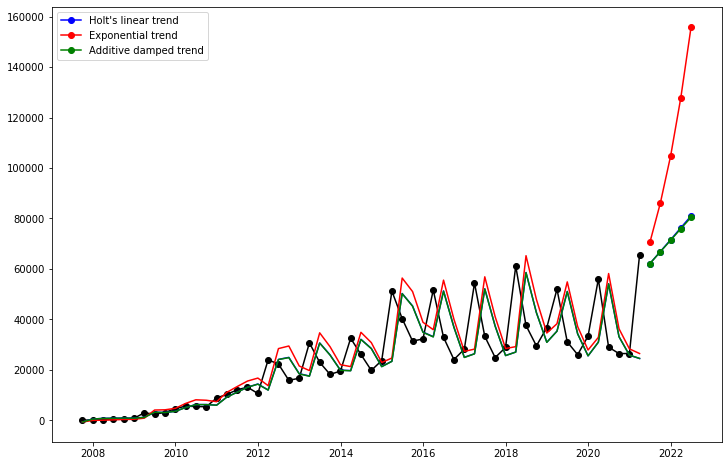

In [331]:
fit1 = Holt(data, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")

fit2 = Holt(data, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2,                                                                           optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")

fit3 = Holt(data, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(data, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue', )
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

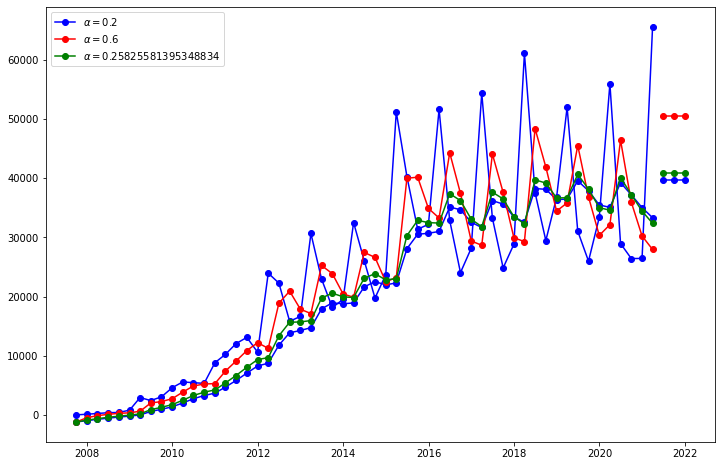

In [330]:
fit1 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(data, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(data, marker='o', color='blue')


plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])